## Objectives:
1. Create a price weighted DJI index
2. Create an equal weighted DJI index
3. Create a value weighted DJI index
4. Compare performance between the three

## Method:
- For PWI, sum the price of shares accross the column, and divide the individual prices by the sum accross
- For Equal Weighted Index, the same weight applies accross
- For Value Weighted Index, we first get the market cap for the stocks and sum them accross the columns, then divide by the individual market caps for the weights

## Key Learnings:
- All three Indexes benefit from the Portfolio Diversification Effect!
- Value Index outperformed the others significantly before trading costs
- PWI and EWI have performance close together (before Trading Costs)
- EWI and VWI requires daily rebalancing, with trading costs likely to eat up profits

## Building an Price-weighted Index

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
pd.set_option('display.float_format', lambda x: '%.2f' % x)





#5 year past data
start = '2019-09-09'
end = '2024-09-09'
symbol = ['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW',
       'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
       'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT',
       '^DJI']
df = yf.download(symbol, start, end ).Close
df

[*********************100%%**********************]  31 of 31 completed


Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,53.54,202.34,119.92,358.78,127.25,149.54,48.58,119.39,138.83,44.45,...,137.52,88.67,122.17,149.23,230.68,181.55,58.66,55.59,38.78,26835.51
2019-09-10,54.17,196.87,117.31,369.49,130.29,149.65,49.21,121.85,135.79,46.32,...,136.08,86.83,119.88,146.57,232.46,176.35,59.71,56.88,38.68,26909.43
2019-09-11,55.90,195.84,118.00,382.94,133.09,154.09,50.03,121.28,136.19,46.88,...,136.12,86.75,121.27,146.23,234.21,174.98,60.13,58.06,38.67,27137.04
2019-09-12,55.77,194.00,119.02,375.63,131.75,154.75,49.93,121.42,137.50,46.97,...,137.52,87.67,122.77,148.30,230.10,177.98,60.43,55.56,38.97,27182.45
2019-09-13,54.69,195.47,119.20,379.76,133.78,152.98,50.03,121.50,138.02,48.20,...,137.32,87.32,122.12,146.31,233.61,177.27,59.96,55.99,39.14,27219.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,229.00,333.83,258.65,173.74,356.10,252.90,50.54,147.95,90.38,53.58,...,417.14,83.32,171.54,228.07,590.20,276.37,41.78,9.25,77.23,41563.08
2024-09-03,222.77,330.51,254.31,161.02,340.24,248.06,50.06,144.66,89.13,51.93,...,409.44,81.32,174.52,227.87,598.68,278.54,42.93,8.97,77.17,40936.93
2024-09-04,220.85,330.64,251.74,163.22,336.75,247.68,49.70,142.07,89.25,51.58,...,408.90,81.02,175.90,231.42,604.18,280.49,41.48,8.65,77.24,40974.97


In [171]:
df.dropna(inplace = True)

In [173]:
close = df.copy()
close

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,53.54,202.34,119.92,358.78,127.25,149.54,48.58,119.39,138.83,44.45,...,137.52,88.67,122.17,149.23,230.68,181.55,58.66,55.59,38.78,26835.51
2019-09-10,54.17,196.87,117.31,369.49,130.29,149.65,49.21,121.85,135.79,46.32,...,136.08,86.83,119.88,146.57,232.46,176.35,59.71,56.88,38.68,26909.43
2019-09-11,55.90,195.84,118.00,382.94,133.09,154.09,50.03,121.28,136.19,46.88,...,136.12,86.75,121.27,146.23,234.21,174.98,60.13,58.06,38.67,27137.04
2019-09-12,55.77,194.00,119.02,375.63,131.75,154.75,49.93,121.42,137.50,46.97,...,137.52,87.67,122.77,148.30,230.10,177.98,60.43,55.56,38.97,27182.45
2019-09-13,54.69,195.47,119.20,379.76,133.78,152.98,50.03,121.50,138.02,48.20,...,137.32,87.32,122.12,146.31,233.61,177.27,59.96,55.99,39.14,27219.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,229.00,333.83,258.65,173.74,356.10,252.90,50.54,147.95,90.38,53.58,...,417.14,83.32,171.54,228.07,590.20,276.37,41.78,9.25,77.23,41563.08
2024-09-03,222.77,330.51,254.31,161.02,340.24,248.06,50.06,144.66,89.13,51.93,...,409.44,81.32,174.52,227.87,598.68,278.54,42.93,8.97,77.17,40936.93
2024-09-04,220.85,330.64,251.74,163.22,336.75,247.68,49.70,142.07,89.25,51.58,...,408.90,81.02,175.90,231.42,604.18,280.49,41.48,8.65,77.24,40974.97


In [176]:
returns = close.pct_change() # simple returns
returns

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10,0.01,-0.03,-0.02,0.03,0.02,0.00,0.01,0.02,-0.02,0.04,...,-0.01,-0.02,-0.02,-0.02,0.01,-0.03,0.02,0.02,-0.00,0.00
2019-09-11,0.03,-0.01,0.01,0.04,0.02,0.03,0.02,-0.00,0.00,0.01,...,0.00,-0.00,0.01,-0.00,0.01,-0.01,0.01,0.02,-0.00,0.01
2019-09-12,-0.00,-0.01,0.01,-0.02,-0.01,0.00,-0.00,0.00,0.01,0.00,...,0.01,0.01,0.01,0.01,-0.02,0.02,0.00,-0.04,0.01,0.00
2019-09-13,-0.02,0.01,0.00,0.01,0.02,-0.01,0.00,0.00,0.00,0.03,...,-0.00,-0.00,-0.01,-0.01,0.02,-0.00,-0.01,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,-0.00,0.01,-0.00,0.01,0.01,-0.02,0.00,0.00,0.01,-0.01,...,0.01,0.00,0.01,0.01,-0.00,0.01,0.01,0.00,0.01,0.01
2024-09-03,-0.03,-0.01,-0.02,-0.07,-0.04,-0.02,-0.01,-0.02,-0.01,-0.03,...,-0.02,-0.02,0.02,-0.00,0.01,0.01,0.03,-0.03,-0.00,-0.02
2024-09-04,-0.01,0.00,-0.01,0.01,-0.01,-0.00,-0.01,-0.02,0.00,-0.01,...,-0.00,-0.00,0.01,0.02,0.01,0.01,-0.03,-0.04,0.00,0.00


In [178]:
index = "^DJI"

In [180]:
const = close.columns.drop([index])
const

Index(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW',
       'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
       'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT'],
      dtype='object', name='Ticker')

In [184]:
close[const]

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,53.54,202.34,119.92,358.78,127.25,149.54,48.58,119.39,138.83,44.45,...,79.65,137.52,88.67,122.17,149.23,230.68,181.55,58.66,55.59,38.78
2019-09-10,54.17,196.87,117.31,369.49,130.29,149.65,49.21,121.85,135.79,46.32,...,77.95,136.08,86.83,119.88,146.57,232.46,176.35,59.71,56.88,38.68
2019-09-11,55.90,195.84,118.00,382.94,133.09,154.09,50.03,121.28,136.19,46.88,...,79.12,136.12,86.75,121.27,146.23,234.21,174.98,60.13,58.06,38.67
2019-09-12,55.77,194.00,119.02,375.63,131.75,154.75,49.93,121.42,137.50,46.97,...,79.49,137.52,87.67,122.77,148.30,230.10,177.98,60.43,55.56,38.97
2019-09-13,54.69,195.47,119.20,379.76,133.78,152.98,50.03,121.50,138.02,48.20,...,78.83,137.32,87.32,122.12,146.31,233.61,177.27,59.96,55.99,39.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,229.00,333.83,258.65,173.74,356.10,252.90,50.54,147.95,90.38,53.58,...,118.45,417.14,83.32,171.54,228.07,590.20,276.37,41.78,9.25,77.23
2024-09-03,222.77,330.51,254.31,161.02,340.24,248.06,50.06,144.66,89.13,51.93,...,116.58,409.44,81.32,174.52,227.87,598.68,278.54,42.93,8.97,77.17
2024-09-04,220.85,330.64,251.74,163.22,336.75,247.68,49.70,142.07,89.25,51.58,...,115.80,408.90,81.02,175.90,231.42,604.18,280.49,41.48,8.65,77.24


In [186]:
close[const].sum(axis = 1).iloc[0] # sum of prices day 1

3960.4207801818848

__Index (Base Value = 100)__

In [189]:
pwi = close[const].sum(axis = 1).div(close[const].sum(axis = 1).iloc[0]).mul(100)
pwi

Date
2019-09-09   100.00
2019-09-10   100.06
2019-09-11   100.86
2019-09-12   100.88
2019-09-13   101.03
              ...  
2024-08-30   155.47
2024-09-03   153.11
2024-09-04   153.33
2024-09-05   152.37
2024-09-06   150.96
Length: 1258, dtype: float64

In [191]:
pwi.name = "pwi"
pwi

Date
2019-09-09   100.00
2019-09-10   100.06
2019-09-11   100.86
2019-09-12   100.88
2019-09-13   101.03
              ...  
2024-08-30   155.47
2024-09-03   153.11
2024-09-04   153.33
2024-09-05   152.37
2024-09-06   150.96
Name: pwi, Length: 1258, dtype: float64

__Cross-Check with DJI Data__

In [194]:
dji_norm = close["^DJI"].div(close["^DJI"].iloc[0]).mul(100)
dji_norm

Date
2019-09-09   100.00
2019-09-10   100.28
2019-09-11   101.12
2019-09-12   101.29
2019-09-13   101.43
              ...  
2024-08-30   154.88
2024-09-03   152.55
2024-09-04   152.69
2024-09-05   151.87
2024-09-06   150.34
Name: ^DJI, Length: 1258, dtype: float64

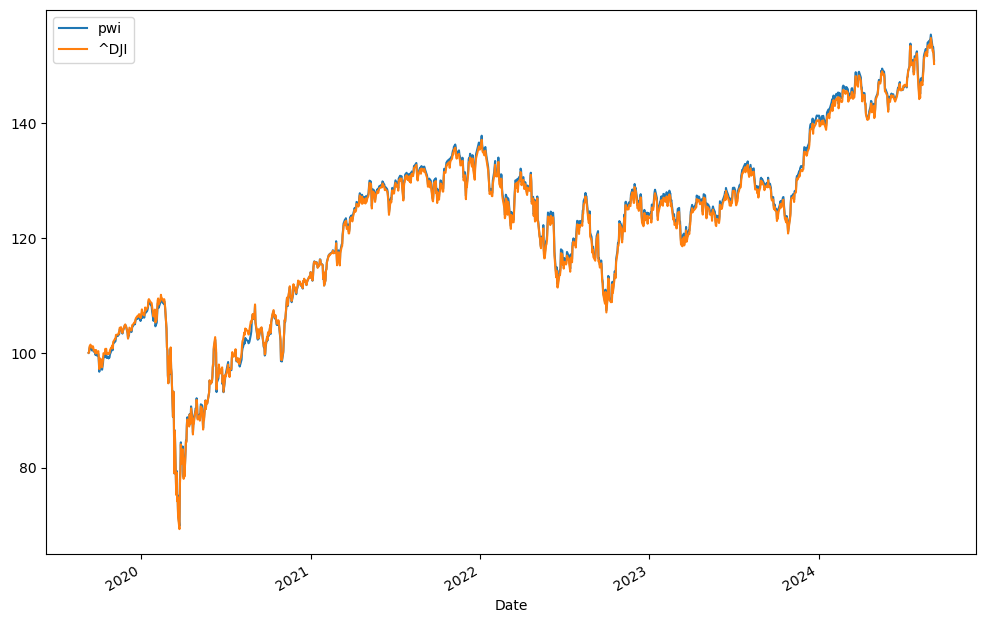

In [196]:
pwi.plot(figsize = (12, 8))
dji_norm.plot()
plt.legend()
plt.show()

__Weights over time__

In [200]:
weights_PWI = close[const].div(close[const].sum(axis = 'columns'),axis = 'rows')
weights_PWI

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,0.01,0.05,0.03,0.09,0.03,0.04,0.01,0.03,0.04,0.01,...,0.02,0.03,0.02,0.03,0.04,0.06,0.05,0.01,0.01,0.01
2019-09-10,0.01,0.05,0.03,0.09,0.03,0.04,0.01,0.03,0.03,0.01,...,0.02,0.03,0.02,0.03,0.04,0.06,0.04,0.02,0.01,0.01
2019-09-11,0.01,0.05,0.03,0.10,0.03,0.04,0.01,0.03,0.03,0.01,...,0.02,0.03,0.02,0.03,0.04,0.06,0.04,0.02,0.01,0.01
2019-09-12,0.01,0.05,0.03,0.09,0.03,0.04,0.01,0.03,0.03,0.01,...,0.02,0.03,0.02,0.03,0.04,0.06,0.04,0.02,0.01,0.01
2019-09-13,0.01,0.05,0.03,0.09,0.03,0.04,0.01,0.03,0.03,0.01,...,0.02,0.03,0.02,0.03,0.04,0.06,0.04,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,0.04,0.05,0.04,0.03,0.06,0.04,0.01,0.02,0.01,0.01,...,0.02,0.07,0.01,0.03,0.04,0.10,0.04,0.01,0.00,0.01
2024-09-03,0.04,0.05,0.04,0.03,0.06,0.04,0.01,0.02,0.01,0.01,...,0.02,0.07,0.01,0.03,0.04,0.10,0.05,0.01,0.00,0.01
2024-09-04,0.04,0.05,0.04,0.03,0.06,0.04,0.01,0.02,0.01,0.01,...,0.02,0.07,0.01,0.03,0.04,0.10,0.05,0.01,0.00,0.01


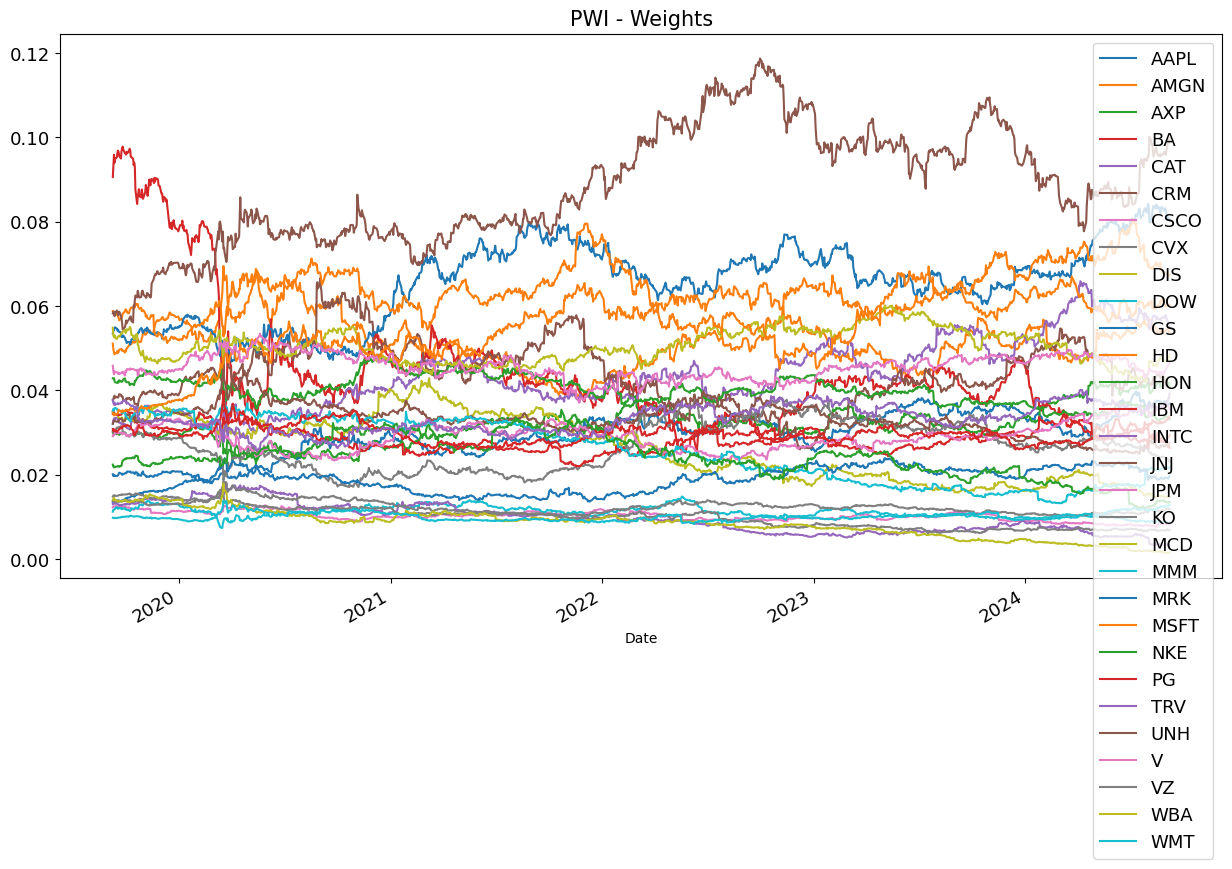

In [202]:
weights_PWI.plot(figsize = (15, 8), fontsize = 13)
plt.title("PWI - Weights", fontsize = 15)
plt.legend(fontsize = 13)
plt.show()

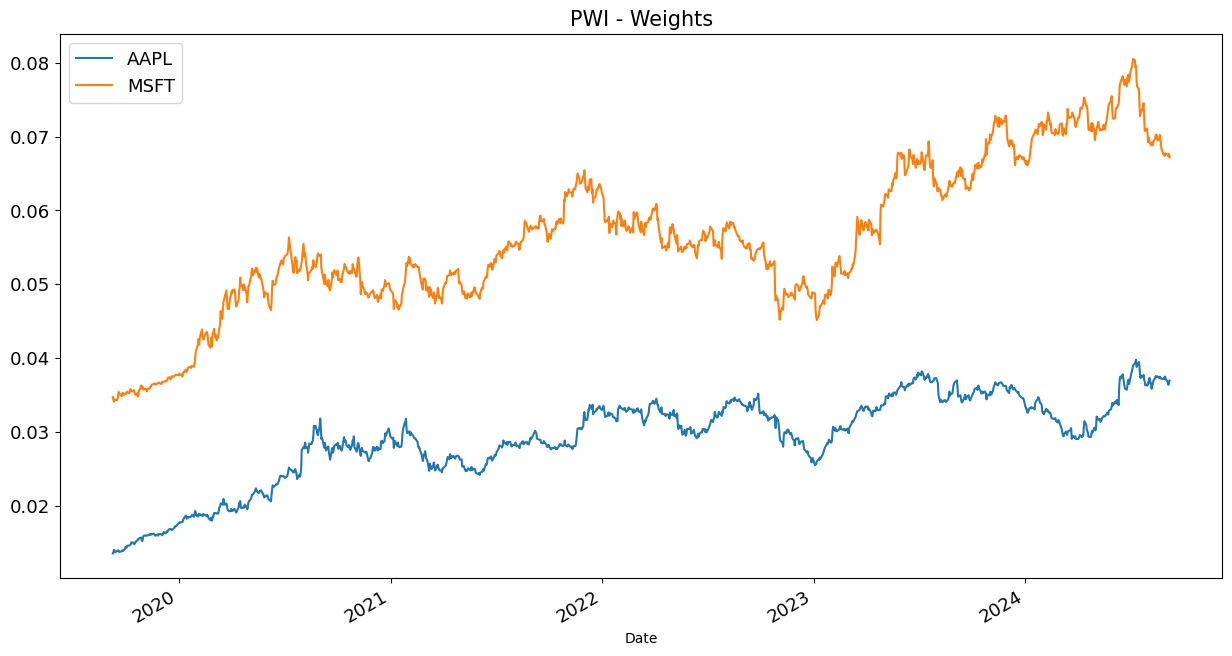

In [203]:
weights_PWI[["AAPL", "MSFT"]].plot(figsize = (15, 8), fontsize = 13)
plt.title("PWI - Weights", fontsize = 15)
plt.legend(fontsize = 13)
plt.show()

## Building an Equal-weighted Index

In [208]:
returns

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10,0.01,-0.03,-0.02,0.03,0.02,0.00,0.01,0.02,-0.02,0.04,...,-0.01,-0.02,-0.02,-0.02,0.01,-0.03,0.02,0.02,-0.00,0.00
2019-09-11,0.03,-0.01,0.01,0.04,0.02,0.03,0.02,-0.00,0.00,0.01,...,0.00,-0.00,0.01,-0.00,0.01,-0.01,0.01,0.02,-0.00,0.01
2019-09-12,-0.00,-0.01,0.01,-0.02,-0.01,0.00,-0.00,0.00,0.01,0.00,...,0.01,0.01,0.01,0.01,-0.02,0.02,0.00,-0.04,0.01,0.00
2019-09-13,-0.02,0.01,0.00,0.01,0.02,-0.01,0.00,0.00,0.00,0.03,...,-0.00,-0.00,-0.01,-0.01,0.02,-0.00,-0.01,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,-0.00,0.01,-0.00,0.01,0.01,-0.02,0.00,0.00,0.01,-0.01,...,0.01,0.00,0.01,0.01,-0.00,0.01,0.01,0.00,0.01,0.01
2024-09-03,-0.03,-0.01,-0.02,-0.07,-0.04,-0.02,-0.01,-0.02,-0.01,-0.03,...,-0.02,-0.02,0.02,-0.00,0.01,0.01,0.03,-0.03,-0.00,-0.02
2024-09-04,-0.01,0.00,-0.01,0.01,-0.01,-0.00,-0.01,-0.02,0.00,-0.01,...,-0.00,-0.00,0.01,0.02,0.01,0.01,-0.03,-0.04,0.00,0.00


In [210]:
mean_ret = returns[const].mean(axis = 1)
mean_ret

Date
2019-09-09     NaN
2019-09-10    0.00
2019-09-11    0.01
2019-09-12    0.00
2019-09-13    0.00
              ... 
2024-08-30    0.01
2024-09-03   -0.02
2024-09-04   -0.00
2024-09-05   -0.00
2024-09-06   -0.01
Length: 1258, dtype: float64

In [212]:
ewi = mean_ret.add(1).cumprod().mul(100)
ewi

Date
2019-09-09      NaN
2019-09-10   100.18
2019-09-11   100.98
2019-09-12   101.11
2019-09-13   101.15
              ...  
2024-08-30   151.17
2024-09-03   148.67
2024-09-04   148.24
2024-09-05   147.52
2024-09-06   146.11
Length: 1258, dtype: float64

In [214]:
ewi.iloc[0] = 100

In [216]:
ewi.name = "ewi"
ewi

Date
2019-09-09   100.00
2019-09-10   100.18
2019-09-11   100.98
2019-09-12   101.11
2019-09-13   101.15
              ...  
2024-08-30   151.17
2024-09-03   148.67
2024-09-04   148.24
2024-09-05   147.52
2024-09-06   146.11
Name: ewi, Length: 1258, dtype: float64

## Building a Value-weighted Index (Part 1)

In [220]:
import yfinance as yf
from yahooquery import Ticker

In [222]:
const

Index(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW',
       'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
       'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT'],
      dtype='object', name='Ticker')

In [224]:
ticker = yf.Ticker(ticker = "AAPL") #yfinance
ticker

yfinance.Ticker object <AAPL>

In [226]:
info = pd.Series(ticker.get_info()) # yfinance
info

address1             One Apple Park Way
city                          Cupertino
state                                CA
zip                               95014
country                   United States
                            ...        
grossMargins                       0.46
ebitdaMargins                      0.34
operatingMargins                   0.30
financialCurrency                   USD
trailingPegRatio                   2.17
Length: 132, dtype: object

In [228]:
shares = info["sharesOutstanding"] #yfinance
shares

15204100096

In [230]:
shares = Ticker("AAPL").key_stats["AAPL"]["sharesOutstanding"] #yahooquery
shares

15204100096

In [231]:
mcap = close.AAPL * shares
mcap

Date
2019-09-09    814065522430.20
2019-09-10    823682111100.99
2019-09-11    849871171196.39
2019-09-12    847970658684.39
2019-09-13    831474224000.00
                   ...       
2024-08-30   3481738921984.00
2024-09-03   3387017443344.84
2024-09-04   3357825599000.06
2024-09-05   3381087853587.25
2024-09-06   3357369494556.88
Name: AAPL, Length: 1258, dtype: float64

(Simplified) Assumption: __Outstanding Shares remained constant__ in the most recent time period (no new share issues or buy-backs)

In [233]:
mcap = close[const].copy() # dummy df to insert mcaps
mcap

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,53.54,202.34,119.92,358.78,127.25,149.54,48.58,119.39,138.83,44.45,...,79.65,137.52,88.67,122.17,149.23,230.68,181.55,58.66,55.59,38.78
2019-09-10,54.17,196.87,117.31,369.49,130.29,149.65,49.21,121.85,135.79,46.32,...,77.95,136.08,86.83,119.88,146.57,232.46,176.35,59.71,56.88,38.68
2019-09-11,55.90,195.84,118.00,382.94,133.09,154.09,50.03,121.28,136.19,46.88,...,79.12,136.12,86.75,121.27,146.23,234.21,174.98,60.13,58.06,38.67
2019-09-12,55.77,194.00,119.02,375.63,131.75,154.75,49.93,121.42,137.50,46.97,...,79.49,137.52,87.67,122.77,148.30,230.10,177.98,60.43,55.56,38.97
2019-09-13,54.69,195.47,119.20,379.76,133.78,152.98,50.03,121.50,138.02,48.20,...,78.83,137.32,87.32,122.12,146.31,233.61,177.27,59.96,55.99,39.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,229.00,333.83,258.65,173.74,356.10,252.90,50.54,147.95,90.38,53.58,...,118.45,417.14,83.32,171.54,228.07,590.20,276.37,41.78,9.25,77.23
2024-09-03,222.77,330.51,254.31,161.02,340.24,248.06,50.06,144.66,89.13,51.93,...,116.58,409.44,81.32,174.52,227.87,598.68,278.54,42.93,8.97,77.17
2024-09-04,220.85,330.64,251.74,163.22,336.75,247.68,49.70,142.07,89.25,51.58,...,115.80,408.90,81.02,175.90,231.42,604.18,280.49,41.48,8.65,77.24


In [234]:
# yfinance (recommended)
count = 1
for symbol in const:
    try:
        shares = yf.Ticker(ticker = symbol).get_info()["sharesOutstanding"]
        mcap[symbol] = mcap[symbol] * shares
        print(count, end = '\r')
        count += 1
    except Exception as e:
        print("{} not found".format(symbol))
print("Download complete.")


Download complete.


In [235]:
# yahooquery (slow)
count = 1
for symbol in const:
    try:
        sharess = Ticker(symbols = symbol).key_stats[symbol]["sharesOutstanding"]
        mcap[symbol] = mcap[symbol] * shares
        print(count, end = '\r')
        count += 1
    except Exception as e:
        print("{} not found".format(symbol))
print("Download complete.")

Download complete.


In [236]:
mcap.iloc[-1].sort_values(ascending = False)

Ticker
AAPL   26987375285903887958016.00
MSFT   24001026457698268348416.00
WMT     4951975749959425196032.00
JPM     4858983046405714608128.00
UNH     4430440079774713380864.00
V       3751216524620485623808.00
PG      3316466066738161123328.00
JNJ     3180752498939608432640.00
HD      2874760575142269026304.00
KO      2464560842903066247168.00
MRK     2401041461790954225664.00
CVX     2021232016721532682240.00
CRM     1874803816638809899008.00
MCD     1669367455002157645824.00
CSCO    1555806533656761597952.00
IBM     1486362940804389404672.00
AXP     1394678018271569510400.00
VZ      1392399807059953975296.00
AMGN    1384557939008149651456.00
CAT     1283756694931343671296.00
DIS     1281997262900335476736.00
GS      1217480041445370626048.00
HON     1034678020864305135616.00
BA       780747684831094374400.00
NKE      778695129366911123456.00
INTC     649278689458888245248.00
MMM      567877649340622897152.00
TRV      429569751464500527104.00
DOW      285540163535846211584.00
WBA    

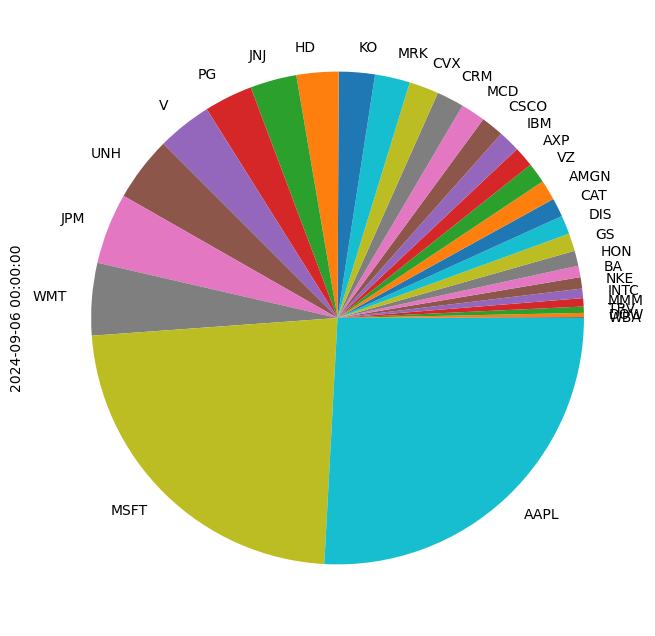

In [237]:
plt.figure(figsize = (12, 8))
mcap.iloc[-1].sort_values().plot.pie()
plt.show()

## Building a Value-weighted Index (Part 2)

In [243]:
mcap

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,6543662172649468985344.00,873943880840274640896.00,685281435181698252800.00,1777164459384594235392.00,495986296743495729152.00,1149150095299474096128.00,1558372871212625297408.00,1741591321410606202880.00,2023876249883517648896.00,250439234620959555584.00,...,1622841434498741305344.00,8216632214850454421504.00,856342528179903791104.00,2307492805689740099584.00,273414187239021117440.00,1712260214435519660032.00,2437747014338386853888.00,1984888686293409071104.00,385751258605592707072.00,2505494830976447021056.00
2019-09-10,6620962716378636222464.00,850317933516250152960.00,670366617041299046400.00,1830214841900443107328.00,507835373459520094208.00,1149995402358078963712.00,1578582228801356824576.00,1777476345936094953472.00,1979558731966910824448.00,260975142229620359168.00,...,1588234188195651387392.00,8130594037989436817408.00,838572514101084684288.00,2264240282837976088576.00,268540645805119995904.00,1725472661614824783872.00,2367924503613711843328.00,2020417694334314086400.00,394702859170462892032.00,2499464185245640163328.00
2019-09-11,6831476928271448276992.00,845869178219564892160.00,674309627969798144000.00,1896837518063973433344.00,518749032748414730240.00,1184114898531314565120.00,1604886576900409917440.00,1769161524537422249984.00,1985390101400147984384.00,264130289876560805888.00,...,1612148185109878013952.00,8132983582150340116480.00,837799885571941597184.00,2290493975557946998784.00,267917687974793805824.00,1738462324656273096704.00,2349528807400490663936.00,2034629374997823488000.00,402891141264852320256.00,2498817912588339249152.00
2019-09-12,6816200133602272346112.00,837921893602722709504.00,680138386926718025728.00,1860628510026955227136.00,513526087198079057920.00,1189186740882944032768.00,1601678777325290258432.00,1771203753562139525120.00,2004487363600501964800.00,264637366793163997184.00,...,1619730679519376572416.00,8216632214850454421504.00,846684892611351150592.00,2318825311077394022400.00,271710285886298292224.00,1707955168639922470912.00,2389811048766965809152.00,2044780501712570679296.00,385543090466743320576.00,2518201902133762064384.00
2019-09-13,6683597667764412612608.00,844271100852464386048.00,681166996577714044928.00,1881085887583651889152.00,521438476800729546752.00,1175585024488005697536.00,1604886576900409917440.00,1772370773374302158848.00,2012068032641710948352.00,271567403658284302336.00,...,1606121145916186689536.00,8204682670662375964672.00,843304734898740133888.00,2306548514299466481664.00,268064264643303440384.00,1734008680594855690240.00,2380277699713101725696.00,2028876988109699940352.00,388526957321700048896.00,2529186318980675010560.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,27987087833930066296832.00,1441873476752599416832.00,1478052382701092601856.00,860595807977778315264.00,1387982108429225295872.00,1943426943528767062016.00,1621246672894766088192.00,2158207823143058800640.00,1317567726667086430208.00,301879289521784684544.00,...,2413470491005892427776.00,24923545491409742069760.00,804674192624529571840.00,3239971403195405041664.00,417862209149961961472.00,4380856734644575404032.00,3710934283254010740736.00,1413717134437349588992.00,64187787953003298816.00,4990097949354569498624.00
2024-09-03,27225692909774412185600.00,1427533882667355078656.00,1453251524090979942400.00,797589134892113985536.00,1326164029551204630528.00,1906233667464524464128.00,1605849014668713787392.00,2110215329769071312896.00,1299345114270718230528.00,292582886548287782912.00,...,2375368522665368223744.00,24463480290788566368256.00,785358921487424290816.00,3296256530598938542080.00,417495753500367388672.00,4443800785437218832384.00,3740071951475506413568.00,1452629937435556446208.00,62244808116586823680.00,4986220806372365172736.00
2024-09-04,26991041567437042483200.00,1428095397809539776512.00,1438565334315342495744.00,8084

In [244]:
total_mcap = mcap.sum(axis = "columns") # total market cap
total_mcap

Date
2019-09-09    54318332459212947324928.00
2019-09-10    54322584439302679166976.00
2019-09-11    54822388806044193128448.00
2019-09-12    54983566319956220968960.00
2019-09-13    54865561251510849896448.00
                         ...            
2024-08-30   107555144640685181763584.00
2024-09-03   105894401668553354772480.00
2024-09-04   105587507956025762250752.00
2024-09-05   105385686591479190913024.00
2024-09-06   104368285170555353563136.00
Length: 1258, dtype: float64

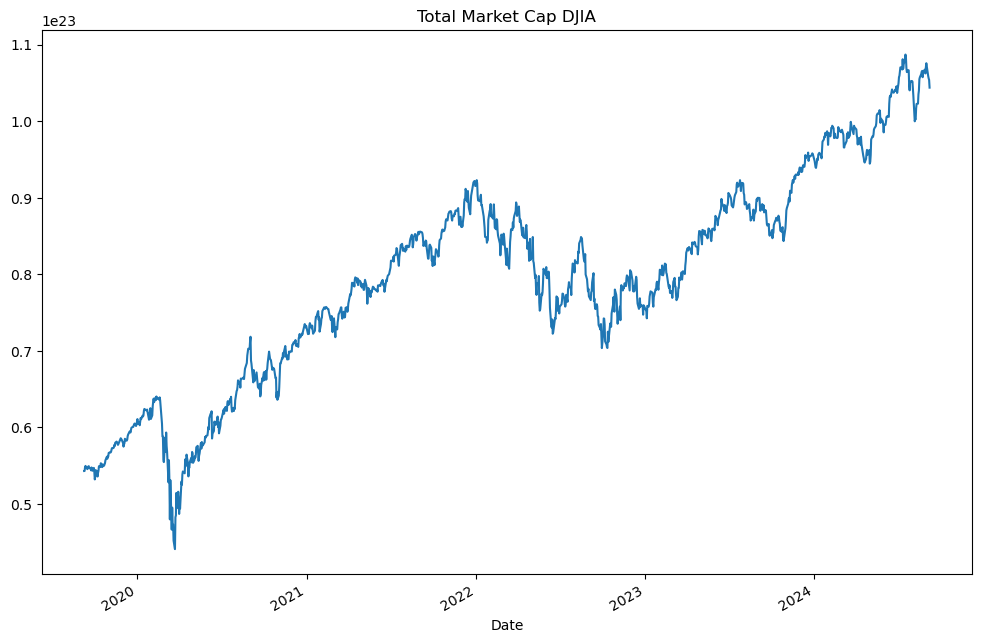

In [245]:
total_mcap.plot(figsize = (12, 8))
plt.title("Total Market Cap DJIA")
plt.show()

__Weights over time__

In [247]:
weights_VWI = mcap.div(total_mcap, axis = "rows")
weights_VWI

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,0.12,0.02,0.01,0.03,0.01,0.02,0.03,0.03,0.04,0.00,...,0.03,0.15,0.02,0.04,0.01,0.03,0.04,0.04,0.01,0.05
2019-09-10,0.12,0.02,0.01,0.03,0.01,0.02,0.03,0.03,0.04,0.00,...,0.03,0.15,0.02,0.04,0.00,0.03,0.04,0.04,0.01,0.05
2019-09-11,0.12,0.02,0.01,0.03,0.01,0.02,0.03,0.03,0.04,0.00,...,0.03,0.15,0.02,0.04,0.00,0.03,0.04,0.04,0.01,0.05
2019-09-12,0.12,0.02,0.01,0.03,0.01,0.02,0.03,0.03,0.04,0.00,...,0.03,0.15,0.02,0.04,0.00,0.03,0.04,0.04,0.01,0.05
2019-09-13,0.12,0.02,0.01,0.03,0.01,0.02,0.03,0.03,0.04,0.00,...,0.03,0.15,0.02,0.04,0.00,0.03,0.04,0.04,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,0.26,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.01,0.00,...,0.02,0.23,0.01,0.03,0.00,0.04,0.03,0.01,0.00,0.05
2024-09-03,0.26,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.01,0.00,...,0.02,0.23,0.01,0.03,0.00,0.04,0.04,0.01,0.00,0.05
2024-09-04,0.26,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.01,0.00,...,0.02,0.23,0.01,0.03,0.00,0.04,0.04,0.01,0.00,0.05


In [248]:
weights_VWI.sum(axis = "columns")

Date
2019-09-09   1.00
2019-09-10   1.00
2019-09-11   1.00
2019-09-12   1.00
2019-09-13   1.00
             ... 
2024-08-30   1.00
2024-09-03   1.00
2024-09-04   1.00
2024-09-05   1.00
2024-09-06   1.00
Length: 1258, dtype: float64

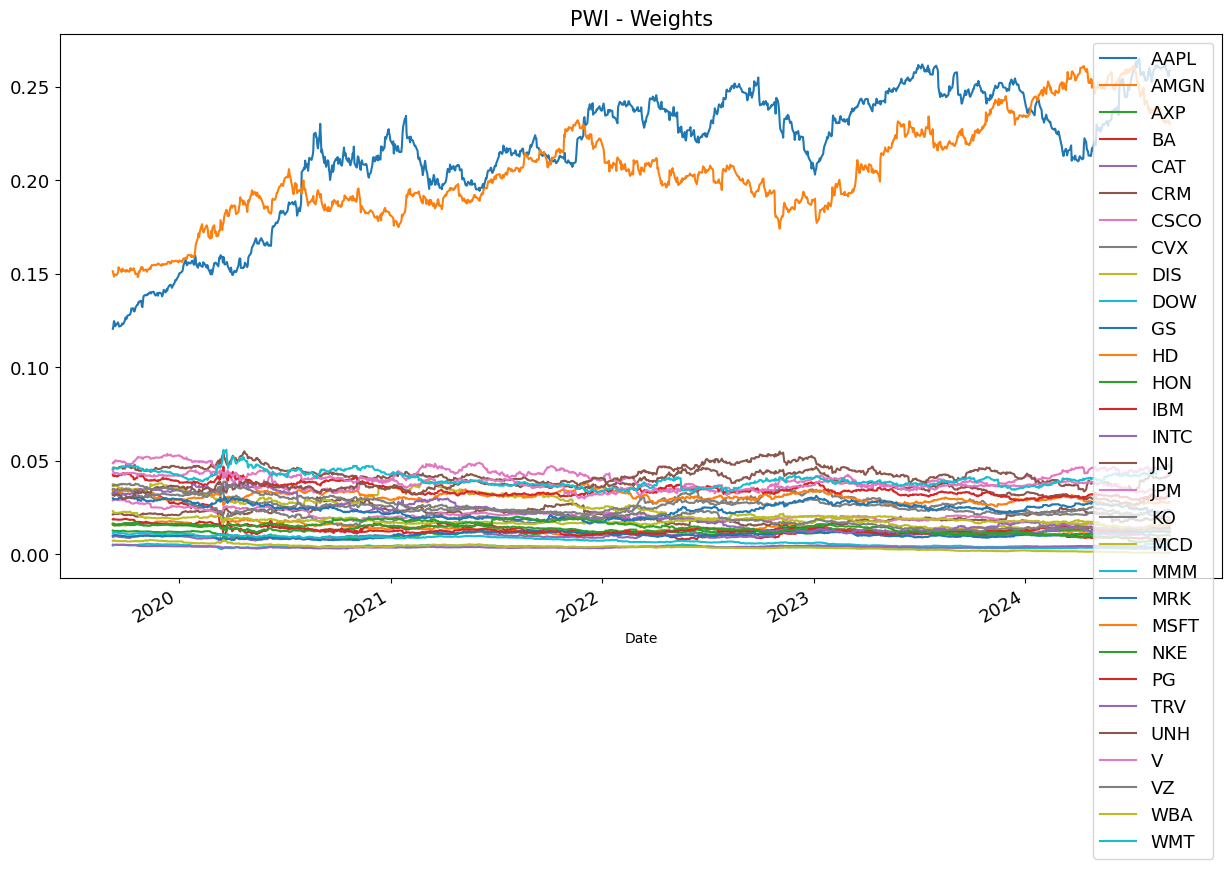

In [249]:
weights_VWI.plot(figsize = (15, 8), fontsize = 13)
plt.title("PWI - Weights", fontsize = 15)
plt.legend(fontsize = 13)
plt.show()

In [250]:
returns # daily return

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10,0.01,-0.03,-0.02,0.03,0.02,0.00,0.01,0.02,-0.02,0.04,...,-0.01,-0.02,-0.02,-0.02,0.01,-0.03,0.02,0.02,-0.00,0.00
2019-09-11,0.03,-0.01,0.01,0.04,0.02,0.03,0.02,-0.00,0.00,0.01,...,0.00,-0.00,0.01,-0.00,0.01,-0.01,0.01,0.02,-0.00,0.01
2019-09-12,-0.00,-0.01,0.01,-0.02,-0.01,0.00,-0.00,0.00,0.01,0.00,...,0.01,0.01,0.01,0.01,-0.02,0.02,0.00,-0.04,0.01,0.00
2019-09-13,-0.02,0.01,0.00,0.01,0.02,-0.01,0.00,0.00,0.00,0.03,...,-0.00,-0.00,-0.01,-0.01,0.02,-0.00,-0.01,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,-0.00,0.01,-0.00,0.01,0.01,-0.02,0.00,0.00,0.01,-0.01,...,0.01,0.00,0.01,0.01,-0.00,0.01,0.01,0.00,0.01,0.01
2024-09-03,-0.03,-0.01,-0.02,-0.07,-0.04,-0.02,-0.01,-0.02,-0.01,-0.03,...,-0.02,-0.02,0.02,-0.00,0.01,0.01,0.03,-0.03,-0.00,-0.02
2024-09-04,-0.01,0.00,-0.01,0.01,-0.01,-0.00,-0.01,-0.02,0.00,-0.01,...,-0.00,-0.00,0.01,0.02,0.01,0.01,-0.03,-0.04,0.00,0.00


In [251]:
weights_VWI # weights at the end of the day

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,0.12,0.02,0.01,0.03,0.01,0.02,0.03,0.03,0.04,0.00,...,0.03,0.15,0.02,0.04,0.01,0.03,0.04,0.04,0.01,0.05
2019-09-10,0.12,0.02,0.01,0.03,0.01,0.02,0.03,0.03,0.04,0.00,...,0.03,0.15,0.02,0.04,0.00,0.03,0.04,0.04,0.01,0.05
2019-09-11,0.12,0.02,0.01,0.03,0.01,0.02,0.03,0.03,0.04,0.00,...,0.03,0.15,0.02,0.04,0.00,0.03,0.04,0.04,0.01,0.05
2019-09-12,0.12,0.02,0.01,0.03,0.01,0.02,0.03,0.03,0.04,0.00,...,0.03,0.15,0.02,0.04,0.00,0.03,0.04,0.04,0.01,0.05
2019-09-13,0.12,0.02,0.01,0.03,0.01,0.02,0.03,0.03,0.04,0.00,...,0.03,0.15,0.02,0.04,0.00,0.03,0.04,0.04,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,0.26,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.01,0.00,...,0.02,0.23,0.01,0.03,0.00,0.04,0.03,0.01,0.00,0.05
2024-09-03,0.26,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.01,0.00,...,0.02,0.23,0.01,0.03,0.00,0.04,0.04,0.01,0.00,0.05
2024-09-04,0.26,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.01,0.00,...,0.02,0.23,0.01,0.03,0.00,0.04,0.04,0.01,0.00,0.05


In [252]:
mcwr = returns[const].mul(weights_VWI.shift()).sum(axis = "columns")
mcwr # simple returns vwi

Date
2019-09-09    0.00
2019-09-10    0.00
2019-09-11    0.01
2019-09-12    0.00
2019-09-13   -0.00
              ... 
2024-08-30    0.00
2024-09-03   -0.02
2024-09-04   -0.00
2024-09-05   -0.00
2024-09-06   -0.01
Length: 1258, dtype: float64

In [253]:
vwi = mcwr.add(1).cumprod().mul(100)
vwi

Date
2019-09-09   100.00
2019-09-10   100.01
2019-09-11   100.93
2019-09-12   101.22
2019-09-13   101.01
              ...  
2024-08-30   198.01
2024-09-03   194.95
2024-09-04   194.39
2024-09-05   194.01
2024-09-06   192.14
Length: 1258, dtype: float64

In [255]:
vwi.name = "vwi"
vwi

Date
2019-09-09   100.00
2019-09-10   100.01
2019-09-11   100.93
2019-09-12   101.22
2019-09-13   101.01
              ...  
2024-08-30   198.01
2024-09-03   194.95
2024-09-04   194.39
2024-09-05   194.01
2024-09-06   192.14
Name: vwi, Length: 1258, dtype: float64

## Analysis and Comparison (Part 1)

In [258]:
indices = pd.concat([vwi, pwi, ewi], axis = 1).iloc[:-1]


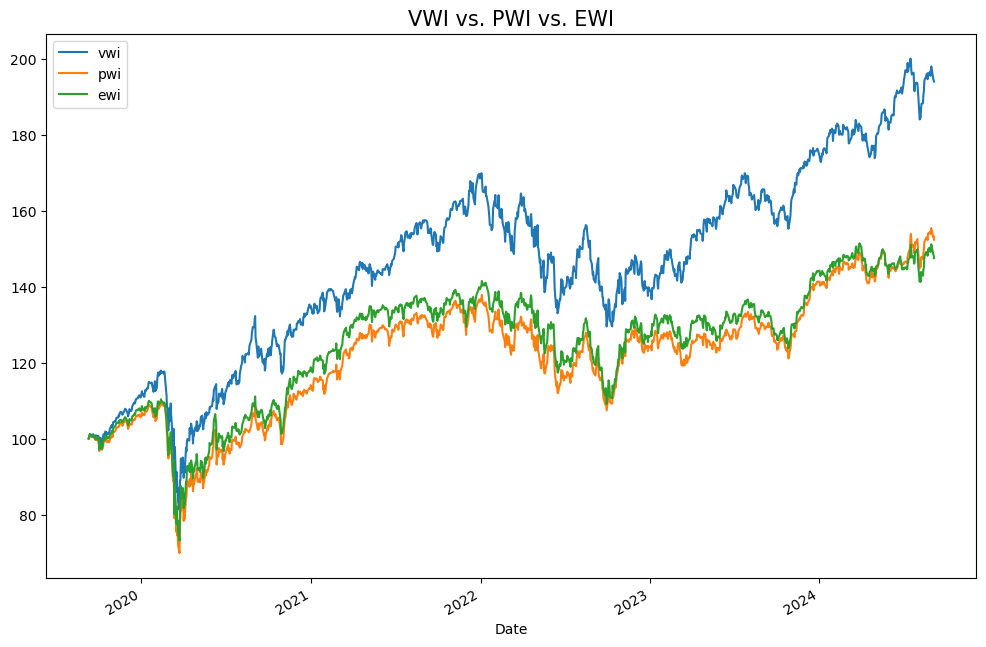

In [259]:
indices.plot(figsize = (12, 8))
plt.title("VWI vs. PWI vs. EWI", fontsize = 15)
plt.show()

__Keep in mind:__ While VWI and PWI are (mostly) __self-rebalancing__, EWI requires/assumes __daily rebalancing__! -> __Trading Costs__! 

In [261]:
indices

,vwi,pwi,ewi
Date,,,
2019-09-09,100.00,100.00,100.00
2019-09-10,100.01,100.06,100.18
2019-09-11,100.93,100.86,100.98
2019-09-12,101.22,100.88,101.11
2019-09-13,101.01,101.03,101.15
...,...,...,...
2024-08-29,197.05,154.76,149.98
2024-08-30,198.01,155.47,151.17
2024-09-03,194.95,153.11,148.67


## Analysis and Comparison (Part 2)

In [263]:
indices

,vwi,pwi,ewi
Date,,,
2019-09-09,100.00,100.00,100.00
2019-09-10,100.01,100.06,100.18
2019-09-11,100.93,100.86,100.98
2019-09-12,101.22,100.88,101.11
2019-09-13,101.01,101.03,101.15
...,...,...,...
2024-08-29,197.05,154.76,149.98
2024-08-30,198.01,155.47,151.17
2024-09-03,194.95,153.11,148.67


In [264]:
close

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,53.54,202.34,119.92,358.78,127.25,149.54,48.58,119.39,138.83,44.45,...,137.52,88.67,122.17,149.23,230.68,181.55,58.66,55.59,38.78,26835.51
2019-09-10,54.17,196.87,117.31,369.49,130.29,149.65,49.21,121.85,135.79,46.32,...,136.08,86.83,119.88,146.57,232.46,176.35,59.71,56.88,38.68,26909.43
2019-09-11,55.90,195.84,118.00,382.94,133.09,154.09,50.03,121.28,136.19,46.88,...,136.12,86.75,121.27,146.23,234.21,174.98,60.13,58.06,38.67,27137.04
2019-09-12,55.77,194.00,119.02,375.63,131.75,154.75,49.93,121.42,137.50,46.97,...,137.52,87.67,122.77,148.30,230.10,177.98,60.43,55.56,38.97,27182.45
2019-09-13,54.69,195.47,119.20,379.76,133.78,152.98,50.03,121.50,138.02,48.20,...,137.32,87.32,122.12,146.31,233.61,177.27,59.96,55.99,39.14,27219.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,229.00,333.83,258.65,173.74,356.10,252.90,50.54,147.95,90.38,53.58,...,417.14,83.32,171.54,228.07,590.20,276.37,41.78,9.25,77.23,41563.08
2024-09-03,222.77,330.51,254.31,161.02,340.24,248.06,50.06,144.66,89.13,51.93,...,409.44,81.32,174.52,227.87,598.68,278.54,42.93,8.97,77.17,40936.93
2024-09-04,220.85,330.64,251.74,163.22,336.75,247.68,49.70,142.07,89.25,51.58,...,408.90,81.02,175.90,231.42,604.18,280.49,41.48,8.65,77.24,40974.97


In [265]:
prices_m = pd.concat([close[const], indices], axis = 1)
prices_m

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,PG,TRV,UNH,V,VZ,WBA,WMT,vwi,pwi,ewi
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,53.54,202.34,119.92,358.78,127.25,149.54,48.58,119.39,138.83,44.45,...,122.17,149.23,230.68,181.55,58.66,55.59,38.78,100.00,100.00,100.00
2019-09-10,54.17,196.87,117.31,369.49,130.29,149.65,49.21,121.85,135.79,46.32,...,119.88,146.57,232.46,176.35,59.71,56.88,38.68,100.01,100.06,100.18
2019-09-11,55.90,195.84,118.00,382.94,133.09,154.09,50.03,121.28,136.19,46.88,...,121.27,146.23,234.21,174.98,60.13,58.06,38.67,100.93,100.86,100.98
2019-09-12,55.77,194.00,119.02,375.63,131.75,154.75,49.93,121.42,137.50,46.97,...,122.77,148.30,230.10,177.98,60.43,55.56,38.97,101.22,100.88,101.11
2019-09-13,54.69,195.47,119.20,379.76,133.78,152.98,50.03,121.50,138.02,48.20,...,122.12,146.31,233.61,177.27,59.96,55.99,39.14,101.01,101.03,101.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,229.00,333.83,258.65,173.74,356.10,252.90,50.54,147.95,90.38,53.58,...,171.54,228.07,590.20,276.37,41.78,9.25,77.23,198.01,155.47,151.17
2024-09-03,222.77,330.51,254.31,161.02,340.24,248.06,50.06,144.66,89.13,51.93,...,174.52,227.87,598.68,278.54,42.93,8.97,77.17,194.95,153.11,148.67
2024-09-04,220.85,330.64,251.74,163.22,336.75,247.68,49.70,142.07,89.25,51.58,...,175.90,231.42,604.18,280.49,41.48,8.65,77.24,194.39,153.33,148.24


In [266]:
returns_m = prices_m.pct_change().dropna() # simple returns
returns_m

/var/folders/bl/tb4yc6js67lbf9670p_lh1km0000gn/T/ipykernel_18506/2408452845.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_m = prices_m.pct_change().dropna() # simple returns


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,PG,TRV,UNH,V,VZ,WBA,WMT,vwi,pwi,ewi
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-10,0.01,-0.03,-0.02,0.03,0.02,0.00,0.01,0.02,-0.02,0.04,...,-0.02,-0.02,0.01,-0.03,0.02,0.02,-0.00,0.00,0.00,0.00
2019-09-11,0.03,-0.01,0.01,0.04,0.02,0.03,0.02,-0.00,0.00,0.01,...,0.01,-0.00,0.01,-0.01,0.01,0.02,-0.00,0.01,0.01,0.01
2019-09-12,-0.00,-0.01,0.01,-0.02,-0.01,0.00,-0.00,0.00,0.01,0.00,...,0.01,0.01,-0.02,0.02,0.00,-0.04,0.01,0.00,0.00,0.00
2019-09-13,-0.02,0.01,0.00,0.01,0.02,-0.01,0.00,0.00,0.00,0.03,...,-0.01,-0.01,0.02,-0.00,-0.01,0.01,0.00,-0.00,0.00,0.00
2019-09-16,0.01,-0.01,-0.01,-0.00,-0.00,0.00,-0.00,0.02,-0.02,0.02,...,-0.02,0.00,0.00,-0.01,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,-0.00,0.01,-0.00,0.01,0.01,-0.02,0.00,0.00,0.01,-0.01,...,0.01,0.01,-0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.01
2024-09-03,-0.03,-0.01,-0.02,-0.07,-0.04,-0.02,-0.01,-0.02,-0.01,-0.03,...,0.02,-0.00,0.01,0.01,0.03,-0.03,-0.00,-0.02,-0.02,-0.02
2024-09-04,-0.01,0.00,-0.01,0.01,-0.01,-0.00,-0.01,-0.02,0.00,-0.01,...,0.01,0.02,0.01,0.01,-0.03,-0.04,0.00,-0.00,0.00,-0.00


In [267]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [268]:
summary = ann_risk_return(returns_m)
summary

,ann. Risk,CAGR
AAPL,0.32,0.33
AMGN,0.26,0.10
AXP,0.38,0.15
BA,0.51,-0.15
CAT,0.32,0.21
CRM,0.39,0.10
CSCO,0.28,-0.00
CVX,0.36,0.03
DIS,0.34,-0.09
DOW,0.36,0.03


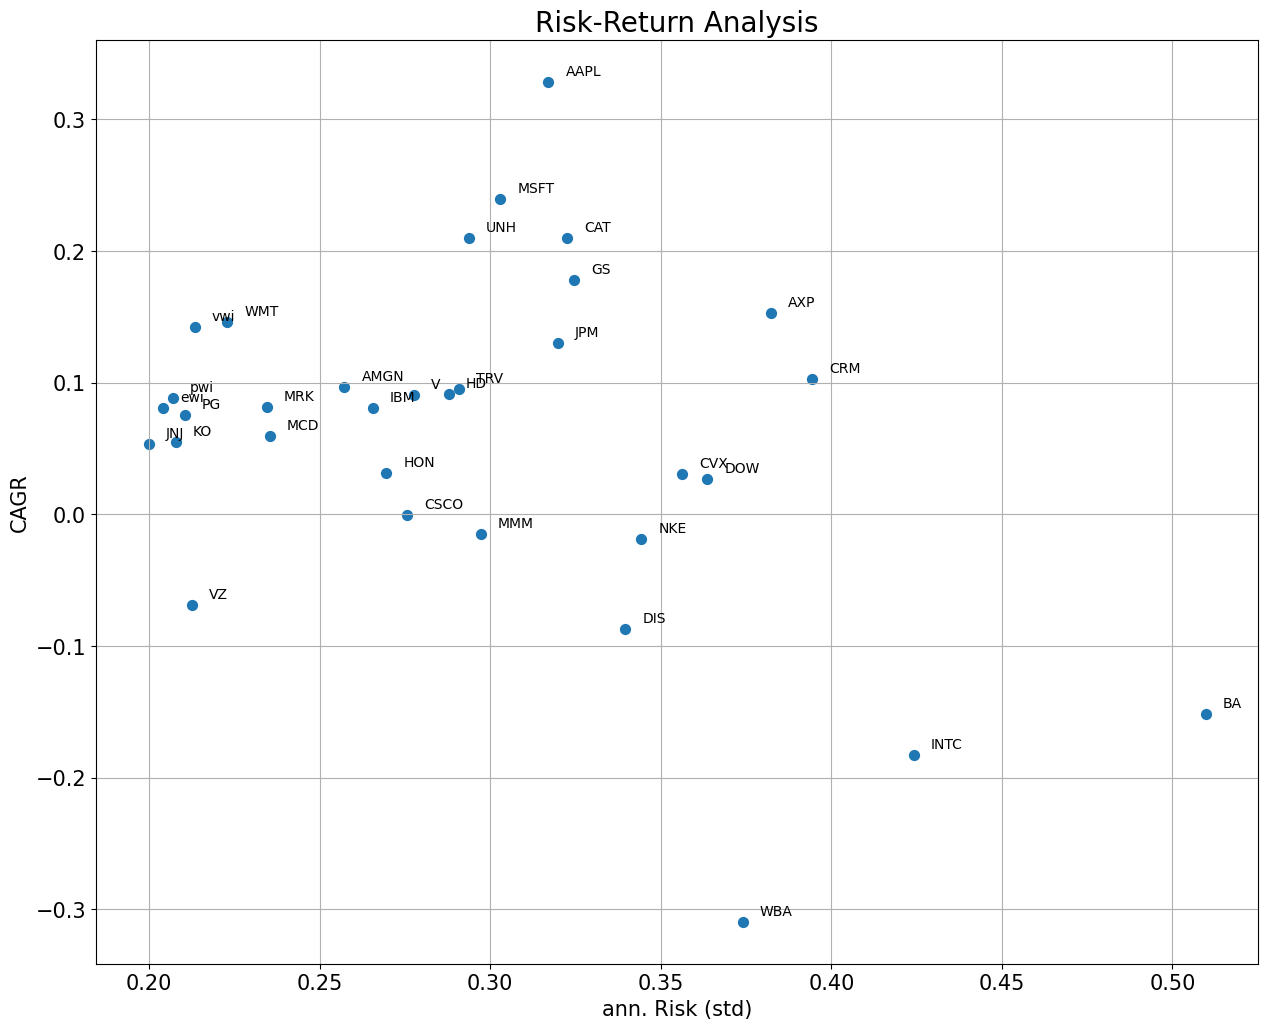

In [269]:
summary.plot(kind = "scatter", x = "ann. Risk", y = "CAGR", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.005, summary.loc[i, "CAGR"]+0.005), size = 10)
plt.grid()
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk-Return Analysis", fontsize = 20)
plt.show()

## The DJIA Total Return Index

In [282]:
weights_PWI # based on Close Prices

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,0.01,0.05,0.03,0.09,0.03,0.04,0.01,0.03,0.04,0.01,...,0.02,0.03,0.02,0.03,0.04,0.06,0.05,0.01,0.01,0.01
2019-09-10,0.01,0.05,0.03,0.09,0.03,0.04,0.01,0.03,0.03,0.01,...,0.02,0.03,0.02,0.03,0.04,0.06,0.04,0.02,0.01,0.01
2019-09-11,0.01,0.05,0.03,0.10,0.03,0.04,0.01,0.03,0.03,0.01,...,0.02,0.03,0.02,0.03,0.04,0.06,0.04,0.02,0.01,0.01
2019-09-12,0.01,0.05,0.03,0.09,0.03,0.04,0.01,0.03,0.03,0.01,...,0.02,0.03,0.02,0.03,0.04,0.06,0.04,0.02,0.01,0.01
2019-09-13,0.01,0.05,0.03,0.09,0.03,0.04,0.01,0.03,0.03,0.01,...,0.02,0.03,0.02,0.03,0.04,0.06,0.04,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,0.04,0.05,0.04,0.03,0.06,0.04,0.01,0.02,0.01,0.01,...,0.02,0.07,0.01,0.03,0.04,0.10,0.04,0.01,0.00,0.01
2024-09-03,0.04,0.05,0.04,0.03,0.06,0.04,0.01,0.02,0.01,0.01,...,0.02,0.07,0.01,0.03,0.04,0.10,0.05,0.01,0.00,0.01
2024-09-04,0.04,0.05,0.04,0.03,0.06,0.04,0.01,0.02,0.01,0.01,...,0.02,0.07,0.01,0.03,0.04,0.10,0.05,0.01,0.00,0.01


In [288]:
total_returns = df.pct_change() # Adj Close Prices!
total_returns

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10,0.01,-0.03,-0.02,0.03,0.02,0.00,0.01,0.02,-0.02,0.04,...,-0.01,-0.02,-0.02,-0.02,0.01,-0.03,0.02,0.02,-0.00,0.00
2019-09-11,0.03,-0.01,0.01,0.04,0.02,0.03,0.02,-0.00,0.00,0.01,...,0.00,-0.00,0.01,-0.00,0.01,-0.01,0.01,0.02,-0.00,0.01
2019-09-12,-0.00,-0.01,0.01,-0.02,-0.01,0.00,-0.00,0.00,0.01,0.00,...,0.01,0.01,0.01,0.01,-0.02,0.02,0.00,-0.04,0.01,0.00
2019-09-13,-0.02,0.01,0.00,0.01,0.02,-0.01,0.00,0.00,0.00,0.03,...,-0.00,-0.00,-0.01,-0.01,0.02,-0.00,-0.01,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,-0.00,0.01,-0.00,0.01,0.01,-0.02,0.00,0.00,0.01,-0.01,...,0.01,0.00,0.01,0.01,-0.00,0.01,0.01,0.00,0.01,0.01
2024-09-03,-0.03,-0.01,-0.02,-0.07,-0.04,-0.02,-0.01,-0.02,-0.01,-0.03,...,-0.02,-0.02,0.02,-0.00,0.01,0.01,0.03,-0.03,-0.00,-0.02
2024-09-04,-0.01,0.00,-0.01,0.01,-0.01,-0.00,-0.01,-0.02,0.00,-0.01,...,-0.00,-0.00,0.01,0.02,0.01,0.01,-0.03,-0.04,0.00,0.00


In [290]:
returns_tr = total_returns[const].mul(weights_PWI.shift()).sum(axis = "columns")
returns_tr # simple returns DJI Total Return Index

Date
2019-09-09    0.00
2019-09-10    0.00
2019-09-11    0.01
2019-09-12    0.00
2019-09-13    0.00
              ... 
2024-08-30    0.00
2024-09-03   -0.02
2024-09-04    0.00
2024-09-05   -0.01
2024-09-06   -0.01
Length: 1258, dtype: float64

In [292]:
dji_tr = returns_tr.add(1).cumprod().mul(100)
dji_tr

Date
2019-09-09   100.00
2019-09-10   100.06
2019-09-11   100.86
2019-09-12   100.88
2019-09-13   101.03
              ...  
2024-08-30   155.47
2024-09-03   153.11
2024-09-04   153.33
2024-09-05   152.37
2024-09-06   150.96
Length: 1258, dtype: float64

In [294]:
returns_m["DJI_TR"] = returns_tr
returns_m

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,TRV,UNH,V,VZ,WBA,WMT,vwi,pwi,ewi,DJI_TR
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-10,0.01,-0.03,-0.02,0.03,0.02,0.00,0.01,0.02,-0.02,0.04,...,-0.02,0.01,-0.03,0.02,0.02,-0.00,0.00,0.00,0.00,0.00
2019-09-11,0.03,-0.01,0.01,0.04,0.02,0.03,0.02,-0.00,0.00,0.01,...,-0.00,0.01,-0.01,0.01,0.02,-0.00,0.01,0.01,0.01,0.01
2019-09-12,-0.00,-0.01,0.01,-0.02,-0.01,0.00,-0.00,0.00,0.01,0.00,...,0.01,-0.02,0.02,0.00,-0.04,0.01,0.00,0.00,0.00,0.00
2019-09-13,-0.02,0.01,0.00,0.01,0.02,-0.01,0.00,0.00,0.00,0.03,...,-0.01,0.02,-0.00,-0.01,0.01,0.00,-0.00,0.00,0.00,0.00
2019-09-16,0.01,-0.01,-0.01,-0.00,-0.00,0.00,-0.00,0.02,-0.02,0.02,...,0.00,0.00,-0.01,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,-0.00,0.01,-0.00,0.01,0.01,-0.02,0.00,0.00,0.01,-0.01,...,0.01,-0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.00
2024-09-03,-0.03,-0.01,-0.02,-0.07,-0.04,-0.02,-0.01,-0.02,-0.01,-0.03,...,-0.00,0.01,0.01,0.03,-0.03,-0.00,-0.02,-0.02,-0.02,-0.02
2024-09-04,-0.01,0.00,-0.01,0.01,-0.01,-0.00,-0.01,-0.02,0.00,-0.01,...,0.02,0.01,0.01,-0.03,-0.04,0.00,-0.00,0.00,-0.00,0.00


In [296]:
summary = ann_risk_return(returns_m)
summary

,ann. Risk,CAGR
AAPL,0.32,0.33
AMGN,0.26,0.10
AXP,0.38,0.15
BA,0.51,-0.15
CAT,0.32,0.21
CRM,0.39,0.10
CSCO,0.28,-0.00
CVX,0.36,0.03
DIS,0.34,-0.09
DOW,0.36,0.03


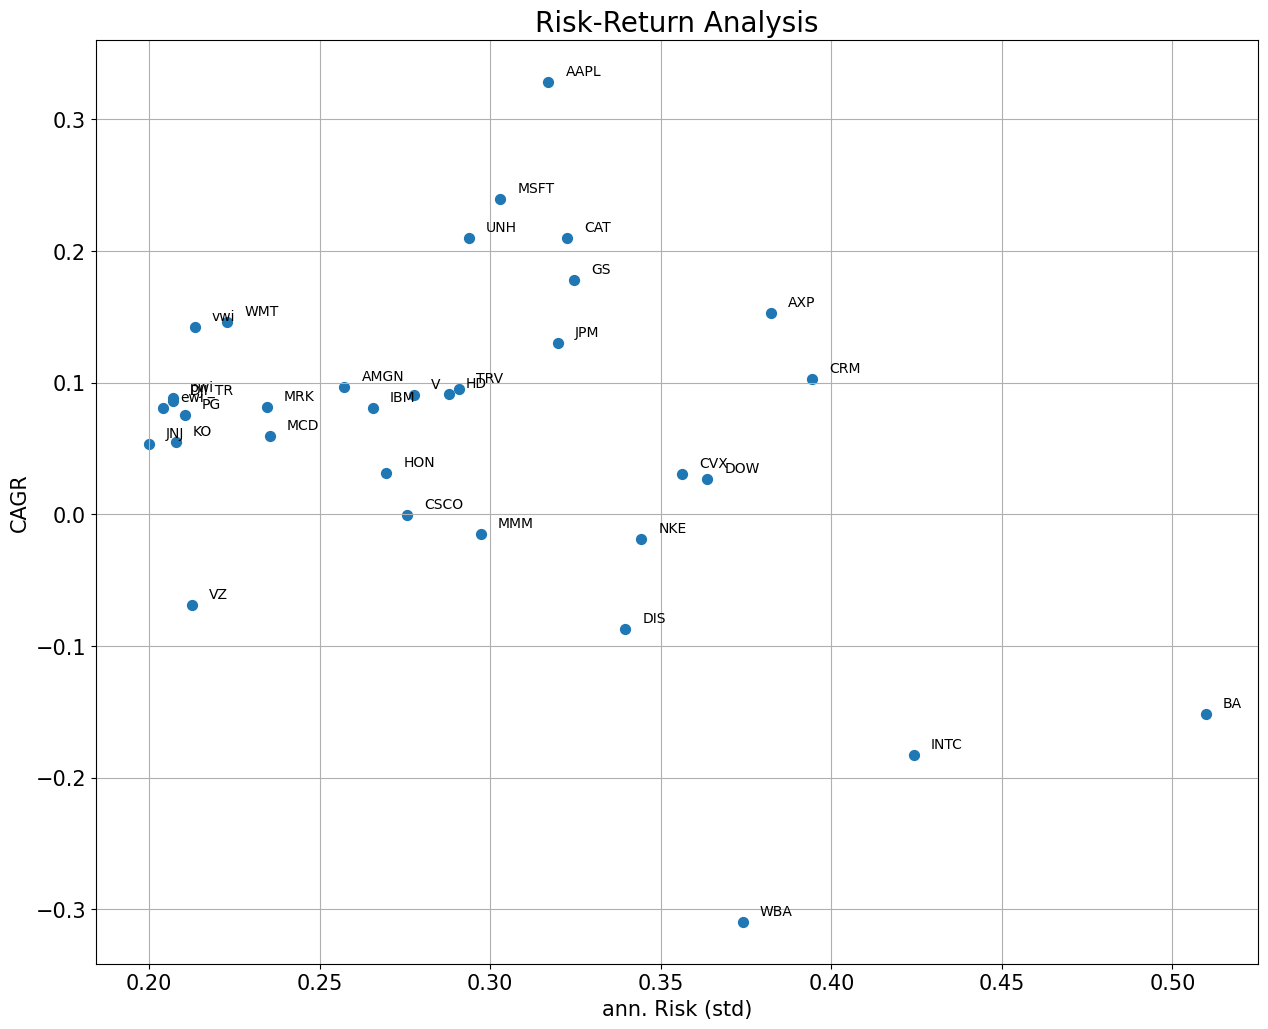

In [298]:
summary.plot(kind = "scatter", x = "ann. Risk", y = "CAGR", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.005, summary.loc[i, "CAGR"]+0.005), size = 10)
plt.grid()
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk-Return Analysis", fontsize = 20)
plt.show()